# Exercício 4.1

Taking the program of Example 5 as a model, calculate the energy and multipoles of different molecules with different QC methods. How do the results differ? Can one compare the results with values obtained from experiment and, if so, how?

In [1]:
!cat Example5.py

"""Example 5."""

from Definitions import *

# . Header.
logFile.Header ( )

# . Define the energy models.
energyModels = [ QCModelMNDO.WithOptions ( hamiltonian = "am1"  ) ,
                 QCModelMNDO.WithOptions ( hamiltonian = "mndo" ) ,
                 QCModelMNDO.WithOptions ( hamiltonian = "pm3"  ) ]

# . Get the filename.
fileName = os.path.join ( xyzPath, "water.xyz" )

# . Loop over the energy models.
results = []
for model in energyModels:
    molecule = ImportSystem ( fileName )
    molecule.DefineQCModel ( model )
    molecule.Summary ( )
    energy  = molecule.Energy        ( )
    charges = molecule.AtomicCharges ( )
    dipole  = molecule.DipoleMoment  ( )
    results.append ( ( model.hamiltonian.upper ( ), energy, charges, dipole.Norm2 ( ) ) )

# . Output the results.
table = logFile.GetTable ( columns = [ 10, 20, 20, 20, 20, 20 ] )
table.Start  ( )
table.Title  ( "Energy Model Results for Water" )
table.Heading ( "Model"  )
table.Heading ( "Energy" )
table.Heading (

In [2]:
from Definitions import *

In [3]:
# Define the energy models.
energyModels = [ QCModelMNDO.WithOptions ( hamiltonian = "am1"  ) ,
                 QCModelMNDO.WithOptions ( hamiltonian = "mndo" ) ,
                 QCModelMNDO.WithOptions ( hamiltonian = "pm3"  ) ]

In [4]:
ethane = ImportSystem("ethane.xyz")
ethene = ImportSystem("ethene.xyz")
ethanol = ImportSystem("ethanol.xyz")
water = ImportSystem(os.path.join(xyzPath, "water.xyz"))

systems = [ethane, ethene, ethanol, water]

for sys in systems:
    sys.Summary()


System imported from "ethane.xyz" in XYZ format.

System imported from "ethene.xyz" in XYZ format.

System imported from "ethanol.xyz" in XYZ format.

System imported from "~/Programs/pDynamo3/pDynamo3-main/examples/book/data/xyz/water.xyz" in XYZ format.

--------------------------------------------------------------------------------
                           Summary of System "Ethane"
--------------------------------------------------------------------------------
------------------------------------- Atoms ------------------------------------
Atoms                   =             8  Heavy Atoms             =             2
Hydrogens               =             6
--------------------------------- Connectivity ---------------------------------
Angles                  =             0  Atoms                   =             8
Bonds                   =             0  Dihedrals               =             0
Isolates                =             8  Ring Sets               =             0


In [5]:
# . Loop over the energy models.
results = []
for sys in systems:
    sys_results = []
    for model in energyModels:
        molecule = sys
        molecule.DefineQCModel(model)
        molecule.Summary()
        energy  = molecule.Energy()
        charges = molecule.AtomicCharges()
        dipole  = molecule.DipoleMoment()
        sys_results.append((model.hamiltonian.upper(), energy, charges, dipole.Norm2()))
    results.append(sys_results)


--------------------------------------------------------------------------------------------------
                                    Summary of System "Ethane"
--------------------------------------------------------------------------------------------------
---------------------------------------------- Atoms ---------------------------------------------
Atoms                       =                  8  Heavy Atoms                 =                  2
Hydrogens                   =                  6
------------------------------------------ Connectivity ------------------------------------------
Angles                      =                  0  Atoms                       =                  8
Bonds                       =                  0  Dihedrals                   =                  0
Isolates                    =                  8  Ring Sets                   =                  0
---------------------------------------- Electronic State -------------------------------------


--------------------------------------------------------------------------------------------------
                                    Summary of System "Ethanol"
--------------------------------------------------------------------------------------------------
---------------------------------------------- Atoms ---------------------------------------------
Atoms                       =                  9  Heavy Atoms                 =                  3
Hydrogens                   =                  6
------------------------------------------ Connectivity ------------------------------------------
Angles                      =                  0  Atoms                       =                  9
Bonds                       =                  0  Dihedrals                   =                  0
Isolates                    =                  9  Ring Sets                   =                  0
---------------------------------------- Electronic State ------------------------------------

In [6]:
# Output the results
molecule_names = ["Ethane", "Ethene", "Ethanol", "Water"]
for name, sys_result in zip(molecule_names, results):
    print("=" * 90 + f"\n{name:^90}\n" + "=" * 90)
    for (label, energy, charges, dipole) in sys_result:
        print(f"Label: {label}")
        print(f"Energy: {energy:.3f}")
        print("Charges: ", end='')
        for charge in charges: print(f"{charge:.3f}", end=" | ")
        print(f"\nDipole: {dipole:.3f}")
        print("-"*50)

                                          Ethane                                          
Label: AM1
Energy: -68.041
Charges: 0.069 | -0.208 | 0.069 | 0.069 | -0.208 | 0.069 | 0.069 | 0.069 | 
Dipole: 0.000
--------------------------------------------------
Label: MNDO
Energy: -80.240
Charges: -0.006 | 0.018 | -0.006 | -0.006 | 0.018 | -0.006 | -0.006 | -0.006 | 
Dipole: 0.000
--------------------------------------------------
Label: PM3
Energy: -75.889
Charges: 0.035 | -0.105 | 0.035 | 0.035 | -0.105 | 0.035 | 0.035 | 0.035 | 
Dipole: 0.000
--------------------------------------------------
                                          Ethene                                          
Label: AM1
Energy: 70.082
Charges: 0.107 | -0.215 | 0.107 | -0.215 | 0.107 | 0.107 | 
Dipole: 0.000
--------------------------------------------------
Label: MNDO
Energy: 65.090
Charges: 0.040 | -0.079 | 0.040 | -0.079 | 0.040 | 0.040 | 
Dipole: 0.000
--------------------------------------------------
Label:

## COMMENTS:

### It is clear that, from all the methods used above, all the calculated partial charges differ in number, but their proportion are allways the same, and they allways sum 0. In ethanol, for example, from a physical-chemistry perpective, one atom has the most negative partial charge, corresponding to the O atom. 

### According to NIST, the experimental value of dipole for water is 1.857. Therefore, all of the calculated values are according to the experimental measure.

### According to NIST, the experimental value of dipole for ethanol is 1.520. Therefore, all of the calculated values are according to the experimental measure.

### Overall, every method presented adequate results.

In [7]:
# avaluating the ionization energy of water
# ionizing water
water.electronicState.SetOptions(charge=1, multiplicity=2, isSpinRestricted=False)

# re-running QC model
ionized_energies= []
for model in energyModels:
    water.DefineQCModel(model)
    ionized_energies.append(water.Energy())


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -2.70121216          0.00000000          0.00000000          0.00000000   Init.
         1         -4.98250929         -2.70121216          0.03402069          0.00000000     ODA           0
         2         -4.99067769         -2.28129713          0.00231959          0.03435988     ODA           1
         3         -4.99168167         -0.00816840          0.00010177          0.01125289    DIIS           2
         4         -4.99168304         -0.00100398          0.00004530          0.00038055    DIIS           3
         5         -4.99168318         -0.00000137          0.00002963          0.00013514    DIIS           4
         6       

In [8]:
for (label, energy, charges, dipole), ion_energy in zip(results[3], ionized_energies):
    print(f"{label}\nBefore ionization: {energy}\nAfter ionization: {ion_energy}"
          f"\nIonization Energy: {ion_energy-energy}\n")


AM1
Before ionization: -247.37077307013715
After ionization: 912.0234781495219
Ionization Energy: 1159.394251219659

MNDO
Before ionization: -254.13128110757316
After ionization: 881.9279032279792
Ionization Energy: 1136.0591843355523

PM3
Before ionization: -222.8239129519825
After ionization: 942.7622707756218
Ionization Energy: 1165.5861837276043



## COMMENTS:

### The ionization value for water, from NIST, is 12eV, or 1160 kJ/mol.

### We can see that all of the quantum methods got an adequate value. Althoug AM1 got the best result, the difference between methods was small.

# Exercise 4.2

Calculate the energies and properties of a molecule using the same QC approximation but at different molecular geometries. A good example is to consider a simple molecule, such as molecular hydrogen, H2, or ethane, C2H6, and determine the potential energy curves for dissociation of the molecule into two fragments. How does the energy change as a function of the distance between the two fragments? Do the dissociated fragments have a radical
character or are they cationic or anionic? How do the results change on going from a spin-restricted to a spin-unrestricted model?

In [9]:
import matplotlib.pyplot as plt

## H2 molecule

First, I'll create several xyz files, changing the x component of one of the H molecules, to slowly separate both molecules.

In [10]:
# creating several xyz files with differente distances between the two H atoms
distances = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.62, 0.64, 0.66, 
             0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.9, 1.0, 
             1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
             2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 
             3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 
             4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]

for dist in distances:
    with open(f"h2_distances/h2_dist_{dist}.xyz", "w") as f:
        f.write(f"2\nHydrogen molecule\nH 0.0 0.0 0.0\nH {dist} 0.0  0.0")

In [11]:
# reading the xyz files into systems
h2_systems = [ImportSystem(f"h2_distances/h2_dist_{dist}.xyz") for dist in distances]


System imported from "h2_distances/h2_dist_0.1.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.2.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.3.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.4.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.5.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.6.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.62.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.64.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.66.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.68.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.7.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.72.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.74.xyz" in XYZ format.

System imported from "h2_distances/h2_dist_0.76.xyz" in XYZ format.

System imported from "h2_distances/h2_di

In [12]:
# calculating quantum properties for the different geometries
energies = []
atomic_charges = []
for molecule in h2_systems:
    molecule.DefineQCModel(QCModelMNDO.WithOptions(hamiltonian = "pm3"))
    molecule.electronicState.SetOptions(isSpinRestricted=True)
    energies.append(molecule.Energy())
    atomic_charges.append(molecule.AtomicCharges()[0])
energies


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -0.10293191          0.00000000          0.00000000          0.00000000   Init.
         1         -0.78460042         -0.10293191          0.35355339          0.00000000     ODA           0
         2         -0.78460042         -0.68166851          0.00000000          0.00000000     ODA           1
--------------------------------------------------------------------------------------------------------------

SCF converged.

--------------------------- DIIS SCF Converger Report --------------------------
Converged             =            True  Function Calls        =               3
Function Value        =         -0.7846  Iterations         


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0          0.00081120          0.00000000          0.00000000          0.00000000   Init.
         1         -0.53854869          0.00081120          0.35355339          0.00000000     ODA           0
         2         -0.53854869         -0.53935988          0.00000000          0.00000000     ODA           1
--------------------------------------------------------------------------------------------------------------

SCF converged.

--------------------------- DIIS SCF Converger Report --------------------------
Converged            =             True  Function Calls       =                3
Function Value       =        -0.538549  Iterations         


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0          0.05869100          0.00000000          0.00000000          0.00000000   Init.
         1         -0.39282785          0.05869100          0.35355339          0.00000000     ODA           0
         2         -0.39282785         -0.45151885          0.00000000          0.00000000     ODA           1
--------------------------------------------------------------------------------------------------------------

SCF converged.

--------------------------- DIIS SCF Converger Report --------------------------
Converged            =             True  Function Calls       =                3
Function Value       =        -0.392828  Iterations         


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0          0.24064967          0.00000000          0.00000000          0.00000000   Init.
         1          0.08843105          0.24064967          0.35355339          0.00000000     ODA           0
         2          0.08843105         -0.15221862          0.00000000          0.00000000     ODA           1
--------------------------------------------------------------------------------------------------------------

SCF converged.

--------------------------- DIIS SCF Converger Report --------------------------
Converged             =            True  Function Calls        =               3
Function Value        =        0.088431  Iterations         


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0          0.28409230          0.00000000          0.00000000          0.00000000   Init.
         1          0.18821193          0.28409230          0.35355339          0.00000000     ODA           0
         2          0.18821193         -0.09588038          0.00000000          0.00000000     ODA           1
--------------------------------------------------------------------------------------------------------------

SCF converged.

--------------------------- DIIS SCF Converger Report --------------------------
Converged             =            True  Function Calls        =               3
Function Value        =        0.188212  Iterations         


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0          0.32046968          0.00000000          0.00000000          0.00000000   Init.
         1          0.25772343          0.32046968          0.35355339          0.00000000     ODA           0
         2          0.25772343         -0.06274624          0.00000000          0.00000000     ODA           1
--------------------------------------------------------------------------------------------------------------

SCF converged.

--------------------------- DIIS SCF Converger Report --------------------------
Converged             =            True  Function Calls        =               3
Function Value        =        0.257723  Iterations         

[1390.2266224304476,
 817.6206539389323,
 430.27740914398805,
 182.0304848296371,
 36.11091981355912,
 -36.04011071816649,
 -43.62647903512334,
 -49.287734773791726,
 -53.159027537123166,
 -55.36764994873943,
 -56.033539181021524,
 -55.269778277697924,
 -53.183093581477806,
 -49.87434405067734,
 -45.43899775304317,
 -39.967590391268686,
 0.05471116069634263,
 54.57380973960835,
 115.94542808242352,
 178.26901445854014,
 237.85870373494345,
 293.55865867355124,
 346.21823460084096,
 397.3348495950939,
 447.6726847415102,
 496.7519866204198,
 543.3626604598477,
 586.4561124603998,
 625.6665932990425,
 661.2404969377079,
 693.6645584349484,
 723.3633314272814,
 750.6069811868774,
 775.5594025434264,
 798.3513107068086,
 819.1204235591753,
 838.0182879495503,
 855.2025428080461,
 870.828159367936,
 885.0420630151061,
 897.9807868819141,
 909.769825692252,
 920.5237599396053,
 930.3467041089949,
 939.3328980358764,
 947.5673672144038,
 955.1266145244122,
 962.0793188912796,
 968.48702280782

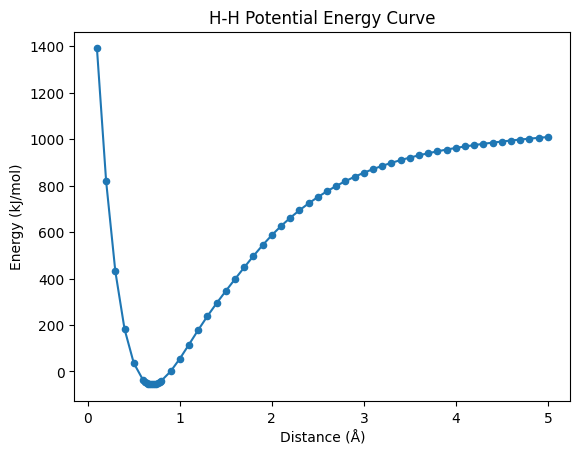

In [13]:
fig, ax = plt.subplots(1, 1)

ax.plot(distances, energies)
ax.scatter(distances, energies, s=20)

ax.set_title("H-H Potential Energy Curve")
ax.set_xlabel("Distance (Å)")
ax.set_ylabel("Energy (kJ/mol)")

plt.show()

In [14]:
print(f"The distance with the smallest energy if {distances[energies.index(min(energies))]} Å")

The distance with the smallest energy if 0.7 Å


## COMMENTS

### The experimental H2 bond length is 0.74 Å
### The PM3 calculated H2 bond length is 0.70 Å
### The calculated distance is not exactly the same as the experimental one, but it has a small margin error

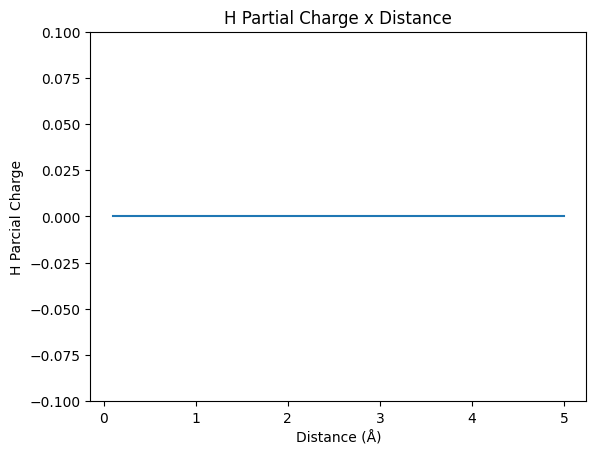

In [15]:
fig, ax = plt.subplots(1, 1)

ax.plot(distances, atomic_charges)

ax.set_title("H Partial Charge x Distance")
ax.set_xlabel("Distance (Å)")
ax.set_ylabel("H Parcial Charge")
ax.set_ylim(-0.1, 0.1)

plt.show()

## COMMENT

### The partial charge of one H atom stays very close to 0 in all geometries, implying that's a homolytic bond break, indicating a radical character.

## HF molecule

In [16]:
distances = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85,
             0.88, 0.9, 0.91, 0.93, 0.95, 0.97, 1.0,
             1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 
             2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 
             3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 
             4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]

for dist in distances:
    with open(f"hf_distances/hf_dist_{dist}.xyz", "w") as f:
        f.write(f"2\nFluoridric Acid molecule\nF 0.0 0.0 0.0\nH {dist} 0.0  0.0")

In [17]:
hf_systems = [ImportSystem(f"hf_distances/hf_dist_{dist}.xyz") for dist in distances]


System imported from "hf_distances/hf_dist_0.1.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.2.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.3.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.4.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.5.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.6.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.7.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.8.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.85.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.88.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.9.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.91.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.93.xyz" in XYZ format.

System imported from "hf_distances/hf_dist_0.95.xyz" in XYZ format.

System imported from "hf_distances/hf_dist

### Spin Restricted Calculations

In [18]:
energies_spin_restricted = []
atomic_charges_f_spin_restricted = []
atomic_charges_h_spin_restricted = []
for molecule in hf_systems[:33]:
    molecule.DefineQCModel(QCModelMNDO.WithOptions(hamiltonian = "am1"))
    molecule.electronicState.SetOptions(isSpinRestricted=True)
    energies_spin_restricted.append(molecule.Energy())
    atomic_charges_f_spin_restricted.append(molecule.AtomicCharges()[0])
    atomic_charges_h_spin_restricted.append(molecule.AtomicCharges()[1])


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -2.83441403          0.00000000          0.00000000          0.00000000   Init.
         1         -4.98929807         -2.83441403          0.07155418          0.00000000     ODA           0
         2         -4.98978597         -2.15488404          0.00136323          0.02266006     ODA           1
         3         -4.98983897         -0.00048790          0.00014432          0.00690027    DIIS           2
         4         -4.98983956         -0.00005300          0.00000222          0.00078368    DIIS           3
         5         -4.98983956         -0.00000059          0.00000000          0.00000381    DIIS           4
         6       


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -2.03692337          0.00000000          0.00000000          0.00000000   Init.
         1         -3.70295136         -2.03692337          0.07155418          0.00000000     ODA           0
         2         -3.70705916         -1.66602799          0.00426625          0.07513265     ODA           1
         3         -3.70781109         -0.00410780          0.00069735          0.02827442    DIIS           2
         4         -3.70782976         -0.00075193          0.00002861          0.00339118    DIIS           3
         5         -3.70782976         -0.00001867          0.00000005          0.00001736    DIIS           4
         6       


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -1.42174351          0.00000000          0.00000000          0.00000000   Init.
         1         -2.71815849         -1.42174351          0.07155418          0.00000000     ODA           0
         2         -2.75614793         -1.29641498          0.01561693          0.19482742     ODA           1
         3         -2.76139124         -0.03798944          0.00193127          0.07013271    DIIS           2
         4         -2.76141295         -0.00524331          0.00033821          0.00427716    DIIS           3
         5         -2.76141325         -0.00002171          0.00000358          0.00054762    DIIS           4
         6       


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -0.32913801          0.00000000          0.00000000          0.00000000   Init.
         1         -1.18962970         -0.32913801          0.07155418          0.00000000     ODA           0
         2         -1.27815709         -0.86049169          0.05545785          0.06450633     ODA           1
         3         -1.27878315         -0.08852739          0.01905566          0.01936890    DIIS           2
         4         -1.27884897         -0.00062606          0.00368441          0.00685716    DIIS           3
         5         -1.27885434         -0.00006582          0.00002535          0.00183823    DIIS           4
         6       

### After the geometry 33, which has a distance of 2,8 Å, the program has an error of too many operations. Because of this, we stopped at 2,8 Å, and couldn't calculate further distances.

In [19]:
hf_systems[33].DefineQCModel(QCModelMNDO.WithOptions(hamiltonian = "am1"))
hf_systems[33].electronicState.SetOptions(isSpinRestricted=True)
hf_systems[33].Energy()


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -0.08440727          0.00000000          0.00000000          0.00000000   Init.
         1         -0.91909484         -0.08440727          0.07155418          0.00000000     ODA           0
         2         -0.61860616         -0.83468757          0.11313708          0.02397868     ODA           1
         3         -0.91885077          0.30048868          0.11313708          0.00000000    DIIS           2
         4         -0.91885077         -0.30024462          0.11313708          0.02178317    DIIS           3
         5         -0.61860616         -0.00000000          0.11313708          0.02178317    DIIS           1
         6       

QCModelError: SCF Converger error: Too many iterations.

In [20]:
# it couldnt run after 33 because it had too many iterations
distances = distances[:33]

### Spin Unrestricted Calculation

In [21]:
energies_no_spin_restricted = []
atomic_charges_f_no_spin_restricted = []
atomic_charges_h_no_spin_restricted = []
for molecule in hf_systems[:33]:
    molecule.DefineQCModel(QCModelMNDO.WithOptions(hamiltonian = "pm3"))
    molecule.electronicState.SetOptions(isSpinRestricted = False)
    energies_no_spin_restricted.append(molecule.Energy())
    atomic_charges_f_no_spin_restricted.append(molecule.AtomicCharges()[0])
    atomic_charges_h_no_spin_restricted.append(molecule.AtomicCharges()[1])


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -2.53194642          0.00000000          0.00000000          0.00000000   Init.
         1         -4.07476623         -2.53194642          0.03577709          0.00000000     ODA           0
         2         -4.09734373         -1.54281980          0.00417031          0.12016928     ODA           1
         3         -4.09908386         -0.02257750          0.00020758          0.03207988    DIIS           2
         4         -4.09908860         -0.00174013          0.00011340          0.00085541    DIIS           3
         5         -4.09908860         -0.00000474          0.00000000          0.00000767    DIIS           4
         6       


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -1.77560201          0.00000000          0.00000000          0.00000000   Init.
         1         -2.81317678         -1.77560201          0.03577709          0.00000000     ODA           0
         2         -2.86456768         -1.03757477          0.00813169          0.09927295     ODA           1
         3         -2.86833291         -0.05139090          0.00059288          0.02689390    DIIS           2
         4         -2.86833459         -0.00376523          0.00021812          0.00063012    DIIS           3
         5         -2.86833500         -0.00000168          0.00000031          0.00025296    DIIS           4
         6       


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -1.16736162          0.00000000          0.00000000          0.00000000   Init.
         1         -1.83921210         -1.16736162          0.03577709          0.00000000     ODA           0
         2         -1.95526998         -0.67185048          0.01743704          0.10996544     ODA           1
         3         -1.96164048         -0.11605788          0.00296303          0.03511071    DIIS           2
         4         -1.96180603         -0.00637051          0.00203710          0.00544419    DIIS           3
         5         -1.96188645         -0.00016555          0.00005958          0.00355493    DIIS           4
         6       


--------------------------------------------------------------------------------------------------------------
   Cycle         Energy           Energy Change    RMS Density Change    Max. DIIS Error        Operation
--------------------------------------------------------------------------------------------------------------
         0         -0.52818673          0.00000000          0.00000000          0.00000000   Init.
         1         -1.02389473         -0.52818673          0.03577709          0.00000000     ODA           0
         2         -1.06021704         -0.49570801          0.04263936          0.03061077     ODA           1
         3         -1.12362692         -0.03632230          0.02290295          0.10956328    DIIS           2
         4         -1.12494004         -0.06340988          0.00792665          0.01390407    DIIS           3
         5         -1.12499893         -0.00131312          0.00078491          0.00217330    DIIS           4
         6       

### Potential Energy Curves

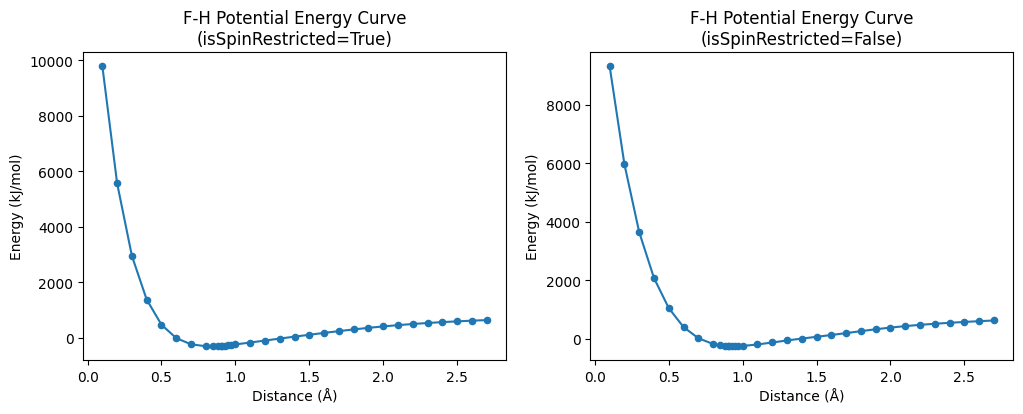

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Spin Restricetd
axs[0].plot(distances, energies_spin_restricted)
axs[0].scatter(distances, energies_spin_restricted, s=20)
axs[0].set_title("F-H Potential Energy Curve\n(isSpinRestricted=True)")
axs[0].set_xlabel("Distance (Å)")
axs[0].set_ylabel("Energy (kJ/mol)")

# Spin Unrestricted
axs[1].plot(distances, energies_no_spin_restricted)
axs[1].scatter(distances, energies_no_spin_restricted, s=20)
axs[1].set_title("F-H Potential Energy Curve\n(isSpinRestricted=False)")
axs[1].set_xlabel("Distance (Å)")
axs[1].set_ylabel("Energy (kJ/mol)")


plt.show()

In [23]:
print(f"The distance with the smallest energy, with spin restricted, is {distances[energies_spin_restricted.index(min(energies_spin_restricted))]} Å")

print(f"The distance with the smallest energy, with spin unrestricted, is {distances[energies_no_spin_restricted.index(min(energies_no_spin_restricted))]} Å")

The distance with the smallest energy, with spin restricted, is 0.85 Å
The distance with the smallest energy, with spin unrestricted, is 0.93 Å


## COMMENTS
### The experimental H-F bond distance is 0,91 Å.

### The calculated H-F bond distance, with spin restricted, is 0,85 Å. 

### The calculated H-F bond distance, with spin unrestricted, is 0,93 Å. 

### The model with spin unrestricted presented a better approximation. However, both methods presented adequate accuracy.

### Partial Atomic Charges

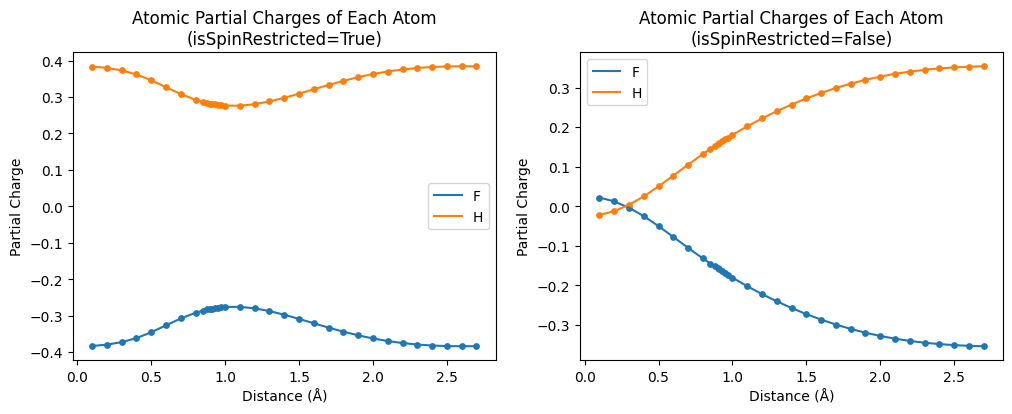

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Spin Restricted

axs[0].plot(distances, atomic_charges_f_spin_restricted)
axs[0].plot(distances, atomic_charges_h_spin_restricted)

axs[0].scatter(distances, atomic_charges_f_spin_restricted, s=15)
axs[0].scatter(distances, atomic_charges_h_spin_restricted, s=15)

axs[0].set_title("Atomic Partial Charges of Each Atom\n(isSpinRestricted=True)")
axs[0].set_xlabel("Distance (Å)")
axs[0].set_ylabel("Partial Charge")
axs[0].legend(["F", "H"])

# Spin Unrestricted

axs[1].plot(distances, atomic_charges_f_no_spin_restricted)
axs[1].plot(distances, atomic_charges_h_no_spin_restricted)

axs[1].scatter(distances, atomic_charges_f_no_spin_restricted, s=15)
axs[1].scatter(distances, atomic_charges_h_no_spin_restricted, s=15)

axs[1].set_title("Atomic Partial Charges of Each Atom\n(isSpinRestricted=False)")
axs[1].set_xlabel("Distance (Å)")
axs[1].set_ylabel("Partial Charge")
axs[1].legend(["F", "H"])

plt.show()

## COMMENTS

### We can see that, on both calculation, the F atom stays with negative partial charge when the bond distance is increased. However, yielding a very different profile. 

### On both graphs, the partial charges calculated when the distance between both nuclei is very small doesn't make much physical-chemical sense, considering both atoms would be overlapping.

### In the spin restricted system, F acquires the most positive partial charge when the bond distance is close to the mininum potential energy value. After that, it gradually decreases and stabilizes at around -0,4. We would expect the F atom to steal an electron and assume a -1 charge, however, the calculations did not present this outcome.

### In the spin unrestrictec system, F seems to stabilize in a partial charge of -0,4.

### To better understand this molecule, calculations could be done at further distances, but unfortunatly, we encountered an error that prevented pDynamo from calculating the molecule's energy at distances bigger than 2,8 Å.